In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


**Cargar datos de blue_jays.csv**

In [8]:
file_path = "/content/sample_data/blue_jays.csv"

**Eliminar columnas no numéricas**

In [9]:
df_numeric = df.drop(columns=["bird_id", "sex"])

**Manejo de valores faltantes e infinitos**

In [10]:
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan)  # Reemplazar infinitos por NaN
df_numeric = df_numeric.dropna()  # Eliminar filas con NaN


**Análisis bivariado con mapa de calor**

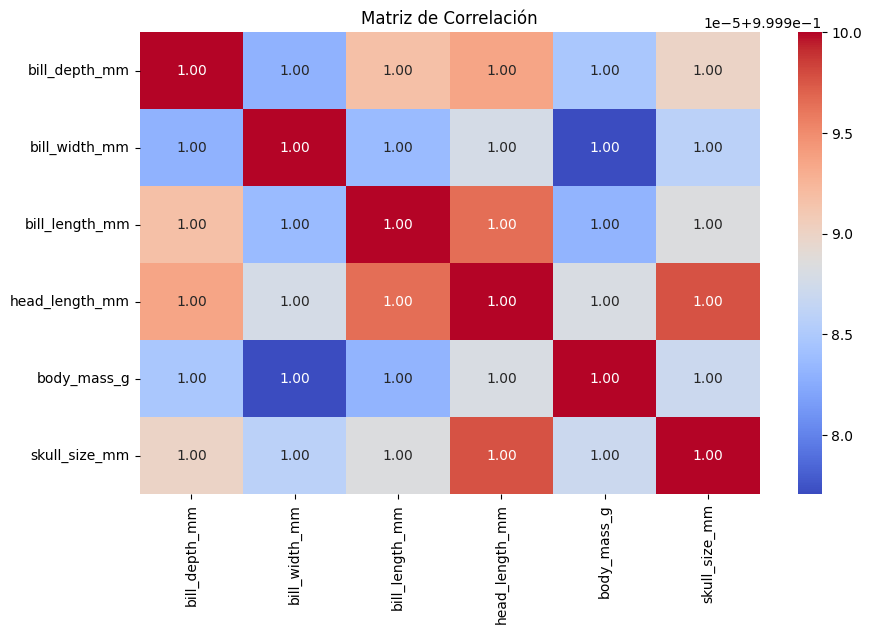

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


**Calcular matriz de covarianza**

In [12]:
cov_matrix = np.cov(df_numeric, rowvar=False)
print("Matriz de Covarianza:")
print(cov_matrix)


Matriz de Covarianza:
[[  8137.67453404   9110.06458025  24548.77529819  55043.10231915
   70722.07847988  30494.72869357]
 [  9110.06458025  10198.99450983  27482.41164613  61621.02072885
   79173.56631267  34139.05869916]
 [ 24548.77529819  27482.41164613  74057.0748946  166049.38061359
  213347.43464183  91993.51754018]
 [ 55043.10231915  61621.02072885 166049.38061359 372315.44628977
  478367.72792675 206268.78335434]
 [ 70722.07847988  79173.56631267 213347.43464183 478367.72792675
  614643.06428251 265023.78638927]
 [ 30494.72869357  34139.05869916  91993.51754018 206268.78335434
  265023.78638927 114276.77169974]]


**Calcular valores y vectores propios**

In [13]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Valores propios:")
print(eigenvalues)
print("Vectores propios:")
print(eigenvectors)


Valores propios:
[1.19362062e+06 7.02091557e+00 1.04282293e+00 2.45575171e-01
 9.44640289e-02 2.77305875e-06]
Vectores propios:
[[ 8.25683377e-02  6.59833242e-02  7.11179518e-02  7.69854248e-02
   9.88859853e-01  5.85261163e-04]
 [ 9.24355828e-02  9.02020781e-02 -1.91558802e-02  9.87415645e-01
  -8.92326798e-02  4.15407239e-04]
 [ 2.49084566e-01  2.90570651e-01  7.14369496e-01 -4.42402238e-02
  -8.84613759e-02  5.77424615e-01]
 [ 5.58497191e-01  5.79489337e-01  1.97356641e-02 -1.11615265e-01
  -7.76891682e-02 -5.77399278e-01]
 [ 7.17591251e-01 -6.95608215e-01  3.06028248e-02 -4.42558761e-03
  -1.53585411e-02 -5.84048282e-05]
 [ 3.09416702e-01  2.88790239e-01 -6.94928401e-01 -6.81823814e-02
   9.83935515e-03  5.77226445e-01]]


**Análisis de Componentes Principales (PCA)**

In [14]:
pca = PCA()
pca.fit(df_numeric)
explained_variance = np.cumsum(pca.explained_variance_ratio_)


**Determinar cuántos componentes explican el 90% de la varianza**

In [15]:
num_components = np.argmax(explained_variance >= 0.90) + 1
print(f"Número de componentes necesarios para explicar el 90% de la varianza: {num_components}")


Número de componentes necesarios para explicar el 90% de la varianza: 1


**Graficar la varianza explicada**

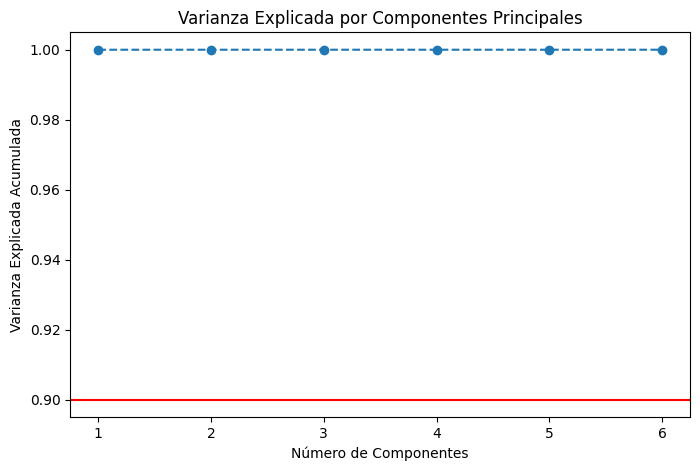

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Varianza Explicada por Componentes Principales")
plt.show()


**EXPLICACION DE LA GRAFICA DE VARIANZA DE COMPONENTES PRINCIPALES **

Se genera una gráfica de líneas donde el eje X representa el número de componentes principales y el eje Y muestra la varianza acumulada explicada por cada uno.

range(1, len(explained_variance) + 1): Genera una lista de índices para los componentes.

explained_variance: Contiene la variación acumulada explicada por cada componente.

marker='o': Dibuja círculos en cada punto de la línea.

linestyle='--': Usa una línea punteada para la visualización.